# Projeto de Previsão de Diabetes

**Objetivo:** Este notebook tem como objetivo construir e avaliar modelos de Machine Learning para prever a ocorrência de diabetes com base em um conjunto de variáveis diagnósticas.

**Dataset:** Utilizaremos o dataset "Pima Indians Diabetes Database", disponível publicamente (mencione a fonte se souber, ex: Kaggle).

**Metodologia:**
1.  Importação das bibliotecas necessárias.
2.  Carregamento e exploração inicial dos dados (EDA).
3.  Pré-processamento dos dados:
    *   Renomear colunas.
    *   Tratamento de valores implausíveis (zeros em certas colunas).
    *   Análise de balanceamento da variável alvo.
4.  Engenharia de Features e Separação Treino/Teste:
    *   Separação inicial dos dados.
    *   Aplicação e comparação de diferentes técnicas de escalonamento (StandardScaler, MinMaxScaler, Misto).
    *   Aplicação de balanceamento (SMOTE) **apenas nos dados de treino**.
5.  Treinamento de Modelos Individuais (Opcional/Baseline):
    *   Treinar modelos básicos nos dados (possivelmente originais ou com um tipo de pré-processamento).
    *   Avaliação inicial.
6.  Avaliação Sistemática com Pipelines:
    *   Criar pipelines combinando pré-processamento, balanceamento (SMOTE) e um modelo (ex: RandomForest).
    *   Comparar o desempenho das diferentes estratégias de pré-processamento.
7.  Conclusão: Resumo dos resultados e escolha da melhor abordagem.

**Observação:** Este notebook explora diferentes técnicas de pré-processamento e balanceamento para entender seu impacto no desempenho do modelo.

## 1. Importação de Bibliotecas

Nesta seção, importamos todas as bibliotecas que serão utilizadas ao longo do projeto, organizadas por funcionalidade.

In [45]:
# [CÓDIGO - Importações]

%load_ext autoreload
%autoreload 2

# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# from pandasgui import show # Comentar ou remover se não for essencial para o notebook final no GitHub

# Preprocessing & Feature Engineering
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE # Para balanceamento

# Model Selection & Splitting
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier # Se usou XGBoost

# Metrics & Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pipeline Tools
from imblearn.pipeline import make_pipeline # Pipeline da imblearn

# Utilities
import warnings
import locale
import sys
import os

# Settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Carregamento e Exploração Inicial dos Dados (EDA)

Carregamos o dataset e realizamos uma análise exploratória inicial para entender sua estrutura, tipos de dados, presença de valores ausentes e estatísticas descritivas básicas.

In [46]:
# [CÓDIGO - Bloco 02: Carregamento]
sys.path.append('../src')
from data.load_data import carregar_dados
nome_arquivo = '../data/raw/v1/Diabetes.csv'

df = carregar_dados(nome_arquivo)
print("Carregando o Dataframe Diabetes.csv")

Carregando o Dataframe Diabetes.csv


### 2.1 Visualização Inicial (Head & Tail)
Verificamos as primeiras e últimas linhas para ter uma ideia geral dos dados.

In [47]:
# [CÓDIGO - Bloco 03: Head]
print("Primeiras 5 linhas:")
display(df.head())

# [CÓDIGO - Bloco 04: Tail]
print("\nÚltimas 5 linhas:")
display(df.tail())

Primeiras 5 linhas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Últimas 5 linhas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 2.2 Informações Gerais e Dimensões
Verificamos os tipos de dados, contagem de valores não nulos e as dimensões do DataFrame (linhas, colunas).

In [48]:
# [CÓDIGO - Bloco 05: Info]
print("\nInformações do DataFrame:")
df.info()

# [CÓDIGO - Bloco 06: Shape]
print("\nShape (Linhas, Colunas):")
print(df.shape)


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Shape (Linhas, Colunas):
(768, 9)


*Interpretação:* O dataset possui X linhas e Y colunas. Todas as colunas parecem ser numéricas (int64 ou float64), o que é esperado para este dataset. Não há valores nulos (`NaN`) reportados pelo `.info()`, mas precisaremos investigar valores 'zero' que podem ser implausíveis.

### 2.3 Nomes das Colunas e Valores Únicos
Listamos as colunas e verificamos a quantidade de valores únicos em cada uma.

In [49]:
# [CÓDIGO - Bloco 07: Columns]
print("\nColunas:")
print(df.columns)

# [CÓDIGO - Bloco 08: Nunique]
print("\nValores Únicos por Coluna:")
print(df.nunique())


Colunas:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Valores Únicos por Coluna:
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


### 2.4 Verificação de Nulos e Duplicados
Confirmamos a ausência de valores nulos padrão e procuramos por linhas duplicadas.

In [50]:
# [CÓDIGO - Bloco 09: IsNull]
print("\nContagem de Valores Nulos por Coluna:")
print(df.isnull().sum())

# [CÓDIGO - Bloco 10: Duplicated]
print("\nLinhas Duplicadas:")
duplicadas = df[df.duplicated(keep=False)]
if duplicadas.empty:
    print("Nenhuma linha duplicada encontrada.")
else:
    display(duplicadas)
    # Opcional: Decidir se remove ou não as duplicadas
    # df = df.drop_duplicates()


Contagem de Valores Nulos por Coluna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Linhas Duplicadas:
Nenhuma linha duplicada encontrada.


*Interpretação:* Não foram encontrados valores nulos (`NaN`) nem linhas duplicadas no dataset.

### 2.5 Estatísticas Descritivas
Analisamos as estatísticas descritivas para entender a distribuição de cada variável (média, mediana, desvio padrão, quartis, mínimos e máximos).

In [51]:
# [CÓDIGO - Bloco 11: Describe]
print("\nEstatísticas Descritivas:")
display(df.describe())


Estatísticas Descritivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Interpretação:* Observamos pontos importantes:
*   Colunas como 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' possuem valor mínimo igual a zero. Isso é biologicamente implausível para a maioria delas e provavelmente indica dados ausentes ou inválidos que precisam ser tratados.
*   As escalas das variáveis são bastante diferentes (compare 'Insulin' com 'Pregnancies'), indicando a necessidade de escalonamento antes de usar modelos sensíveis à escala (como SVM, KNN, Regressão Logística).
*   A coluna 'Outcome' (nosso alvo) é binária (0 ou 1).

## 3. Pré-processamento dos Dados

Nesta etapa, preparamos os dados para a modelagem, incluindo renomeação de colunas e tratamento de valores implausíveis.

### 3.1 Renomear Colunas
Traduzimos os nomes das colunas para português para facilitar a interpretação.

In [52]:
# [CÓDIGO - Bloco 12: Rename]
from features.v1.build_features import build_rename

df = build_rename(df)

print("\nColunas após renomear:")
print(df.columns)
# df.info() # Opcional, para confirmar


Colunas após renomear:
Index(['Gravidez', 'Glicose', 'Pressão arterial', 'Espessura da pele',
       'Insulina', 'IMC', 'Diabetes Descendente', 'Idade', 'Resultado'],
      dtype='object')


### 3.2 Visualização de Outliers/Distribuição (Antes do Tratamento de Zeros)
Usamos boxplots para visualizar a distribuição e potenciais outliers em cada variável *antes* de tratar os valores zero.

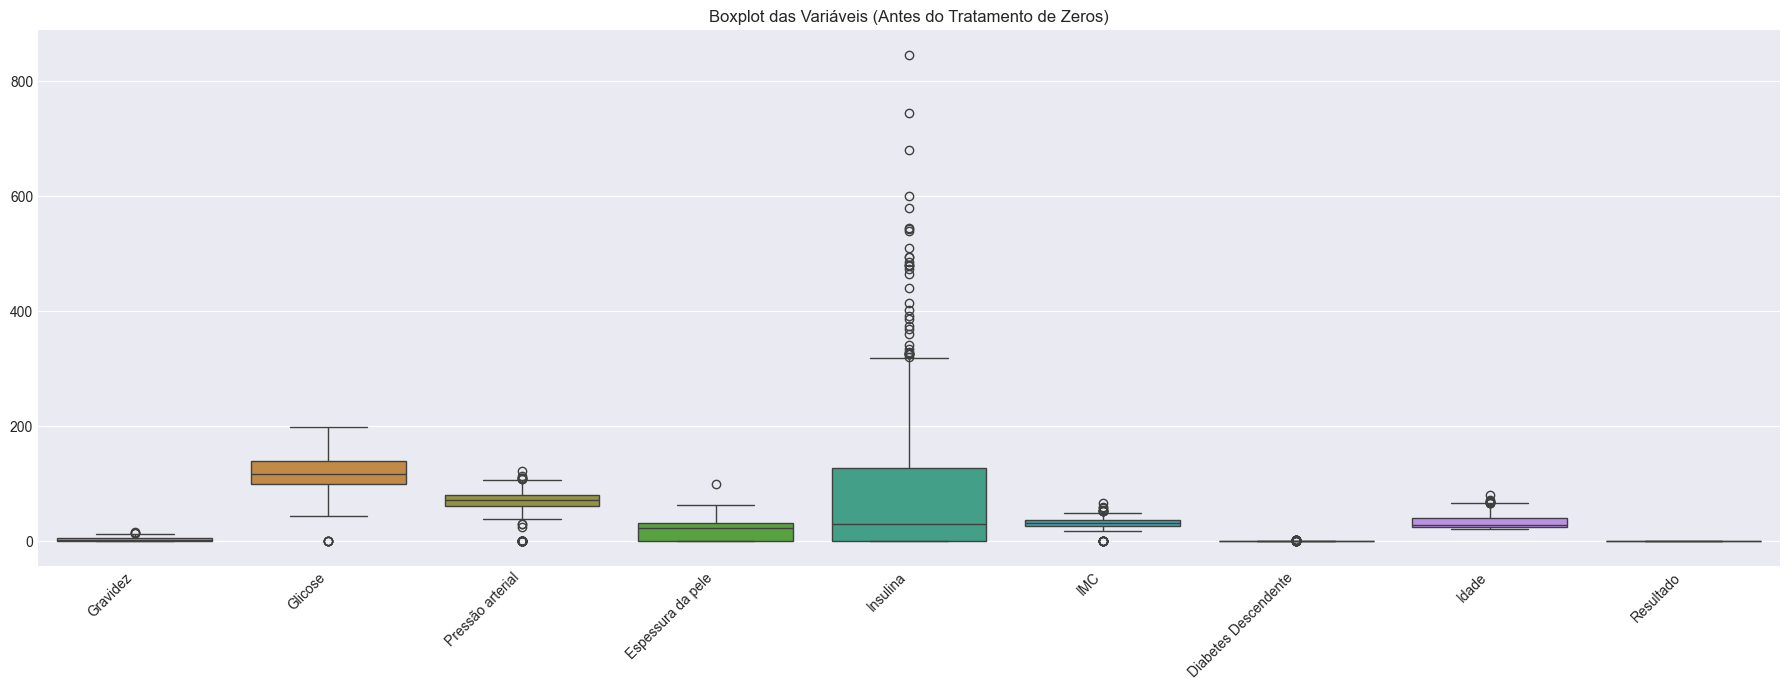

In [53]:
# [CÓDIGO - Bloco 13: Boxplot Antes]
from eda.eda_basic import ver_boxplot

title = "Boxplot das Variáveis (Antes do Tratamento de Zeros)"

ver_boxplot(df, title)

*Interpretação:* O boxplot confirma visualmente a presença de muitos valores 'zero' nas colunas mencionadas ('Glicose', 'Pressão arterial', etc.) e a variação nas escalas e presença de outliers.

In [54]:
# [CÓDIGO - Bloco 14: Tratamento de Zeros pela mediana]
from features.v1.build_features import build_isnull

colunas_para_imputar = ['Glicose', 'Pressão arterial', 'Espessura da pele', 'Insulina', 'IMC']
print("Valores médios ANTES da imputação (apenas para comparação):")
print(df[colunas_para_imputar].replace(0, np.nan).mean()) # Calcula média ignorando zeros

print("\n--- Iniciando Imputação com Mediana (sem zeros) ---")

df = build_isnull(df)

print("--- Imputação Concluída ---")

# Verificação
print("\nZeros restantes nas colunas imputadas:")
print((df[colunas_para_imputar] == 0).sum())

print("\nNovas estatísticas descritivas (colunas imputadas):")
display(df[colunas_para_imputar].describe())

Valores médios ANTES da imputação (apenas para comparação):
Glicose              121.686763
Pressão arterial      72.405184
Espessura da pele     29.153420
Insulina             155.548223
IMC                   32.457464
dtype: float64

--- Iniciando Imputação com Mediana (sem zeros) ---
--- Imputação Concluída ---

Zeros restantes nas colunas imputadas:
Glicose              0
Pressão arterial     0
Espessura da pele    0
Insulina             0
IMC                  0
dtype: int64

Novas estatísticas descritivas (colunas imputadas):


,Glicose,Pressão arterial,Espessura da pele,Insulina,IMC
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208
std,30.438286,12.096642,8.791221,86.383060,6.875177
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


### 3.3 Tratamento de Valores Zero Implausíveis
Substituímos os valores zero nas colunas 'Glicose', 'Pressão arterial', 'Espessura da pele', 'Insulina' e 'IMC' pela *mediana* calculada *excluindo* os zeros. A mediana é usada por ser mais robusta a outliers do que a média.

*Interpretação:* Os valores zero foram substituídos com sucesso. As estatísticas descritivas (especialmente o valor mínimo) agora refletem valores mais plausíveis para essas variáveis.

### 3.4 Visualização de Outliers/Distribuição (Após Tratamento de Zeros)
Replotamos os boxplots para ver o efeito da imputação.

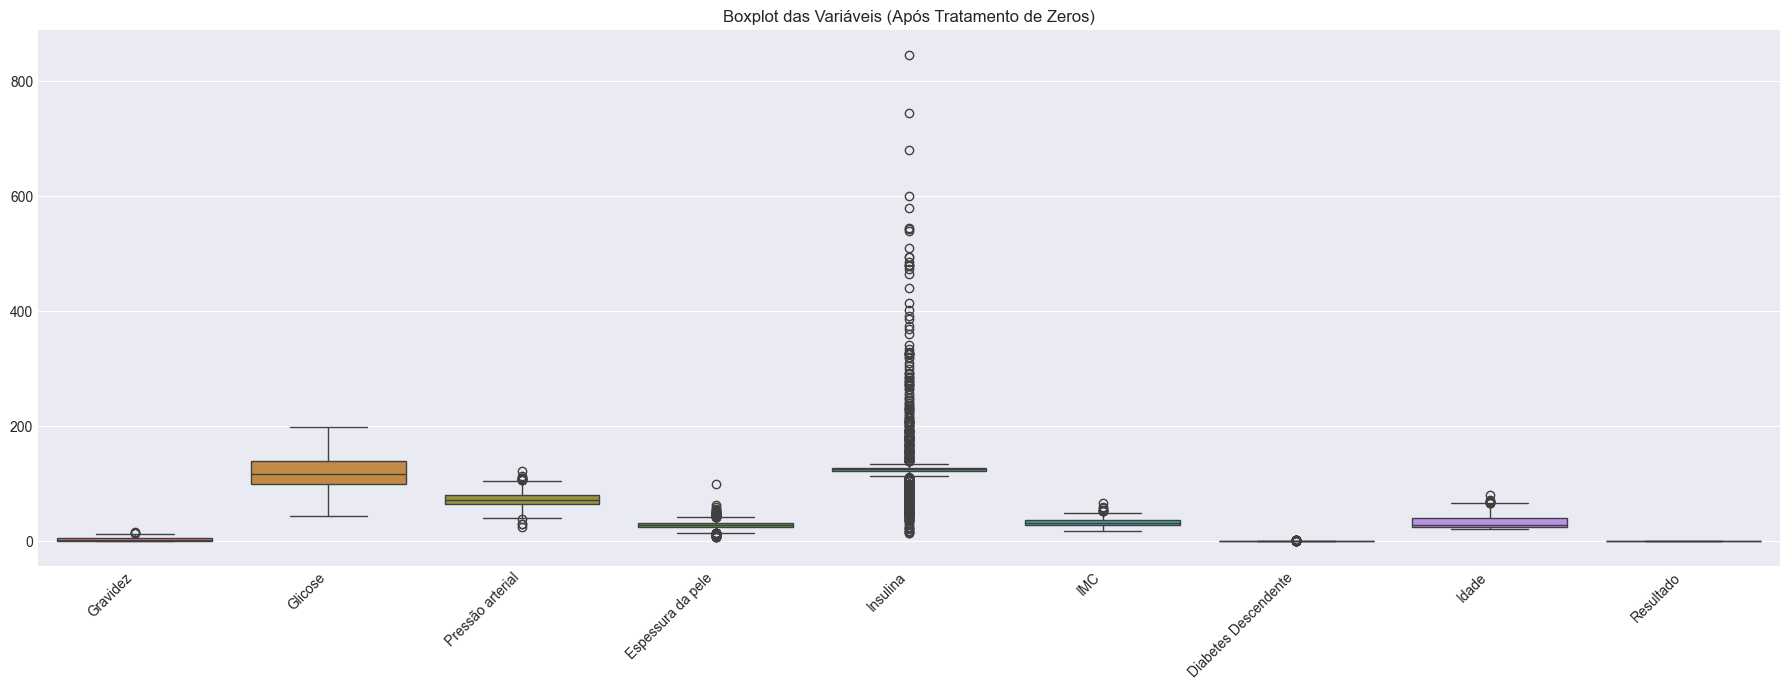

In [55]:
# [CÓDIGO - Bloco 15: Boxplot Depois]

from eda.eda_basic import ver_boxplot

title = "Boxplot das Variáveis (Após Tratamento de Zeros)"

ver_boxplot(df, title)

*Interpretação:* As distribuições parecem mais razoáveis, embora ainda existam outliers e diferenças de escala que serão tratados pelo escalonamento.

### 3.5 Análise de Balanceamento da Variável Alvo ('Resultado')
Verificamos a proporção de classes na variável alvo para identificar desbalanceamento.

Contagem de Classes na Variável 'Resultado':
Resultado
0    500
1    268
Name: count, dtype: int64

Proporção (Classe 0 / Classe 1): 1.87:1


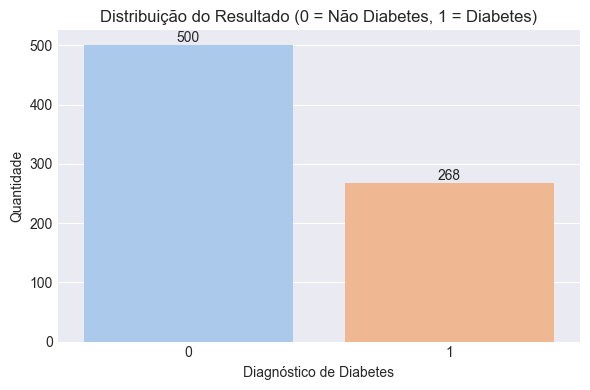

In [56]:
# [CÓDIGO - Bloco 16: Value Counts Target]
from eda.eda_basic import ver_countplot
target_count = df['Resultado'].value_counts()
print("Contagem de Classes na Variável 'Resultado':")
print(target_count)
print(f"\nProporção (Classe 0 / Classe 1): {target_count[0]/target_count[1]:.2f}:1")

# [CÓDIGO - Bloco 17: Countplot Target]
title = "Distribuição do Resultado (0 = Não Diabetes, 1 = Diabetes)"

ver_countplot(df, title)

*Interpretação:* O dataset é **desbalanceado**. Existem aproximadamente X casos de não-diabéticos (classe 0) para cada Y caso de diabético (classe 1). Isso significa que a acurácia por si só pode não ser uma boa métrica. Precisaremos usar técnicas como SMOTE para balancear os dados de treino e/ou focar em métricas como Recall, Precision e F1-Score, especialmente para a classe minoritária (1).

## Preparação para Modelagem: Separação e Escalonamento

Nesta seção, separamos os dados em conjuntos de treino e teste e aplicamos diferentes técnicas de escalonamento, combinadas com balanceamento SMOTE nos dados de treino.

In [57]:
# [CÓDIGO - Bloco 18: Separa X e Y]
# Separando as features (X) e o target (Y)
X = df.drop('Resultado', axis=1)
y = df['Resultado'] # Nome correto é 'y', não 'Y' por convenção
print("Dimensões de X (features):", X.shape)
print("Dimensões de y (target):", y.shape)

Dimensões de X (features): (768, 8)
Dimensões de y (target): (768,)


In [58]:
# [CÓDIGO - Bloco 19: Train/Test Split Principal]
# Dividindo em conjuntos de treino (70%) e teste (30%)
# Usamos stratify=y para manter a proporção das classes
from models.base_model import split_data

X_train, X_test, y_train, y_test = split_data(
    X, y, test_size=0.2, random_state=42
)

print("Dimensões dos Conjuntos de Treino:")
print("X_train:", X_train.shape, " y_train:", y_train.shape)
print("\nDimensões dos Conjuntos de Teste:")
print("X_test:", X_test.shape, " y_test:", y_test.shape)

print("\nDistribuição do target no treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição do target no teste:")
print(y_test.value_counts(normalize=True))

Dimensões dos Conjuntos de Treino:
X_train: (537, 8)  y_train: (537,)

Dimensões dos Conjuntos de Teste:
X_test: (231, 8)  y_test: (231,)

Distribuição do target no treino:
Resultado
0    0.651769
1    0.348231
Name: proportion, dtype: float64

Distribuição do target no teste:
Resultado
0    0.649351
1    0.350649
Name: proportion, dtype: float64


*Observação:* Separamos os dados ANTES de aplicar qualquer escalonamento ou balanceamento para evitar *data leakage* (informação do conjunto de teste "vazar" para o treino). O escalonamento será ajustado (`fit`) **apenas** no `X_train` e depois aplicado (`transform`) em `X_train` e `X_test`. O balanceamento SMOTE será aplicado **apenas** no `X_train` e `y_train` **após** o escalonamento.

## 4. Treinamento do modelo com dados Originais.

In [59]:
# Logistic Regression
from models.v1.pipeline import pipeline

print(" -- < Dados Originais > --")
model_type = "lr"
lr_results = pipeline(X_train, X_test, y_train, y_test, model_type)

# Random Forest
model_type = "rf"
rf_results = pipeline(X_train, X_test, y_train, y_test, model_type)

# XGBClassifier
model_type = "xgb"
xgb_results = pipeline(X_train, X_test, y_train, y_test, model_type)

# Support Vector Classifier
model_type = "svc"
svc_results = pipeline(X_train, X_test, y_train, y_test, model_type)

# Decision Tree
model_type = "dt"
dt_results = pipeline(X_train, X_test, y_train, y_test, model_type)

 -- < Dados Originais > --

Treinando: Logistic Regression

Métricas no conjunto de teste:
  Precision: 0.6719
  Recall:    0.5309
  F1-Score:  0.5931
  ROC-AUC:   0.8347
  Tempo (1000): 0.0770s

Matriz de Confusão:
[[129  21]
 [ 38  43]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.77      0.86      0.81       150
      Fraude       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231

✅ Função de avaliação criada!

Treinando: Random Forest

Métricas no conjunto de teste:
  Precision: 0.6825
  Recall:    0.5309
  F1-Score:  0.5972
  ROC-AUC:   0.8224
  Tempo (1000): 0.9630s

Matriz de Confusão:
[[130  20]
 [ 38  43]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.77      0.87      0.82       150
      Fraude       0.68      0.

## 4.1 Comparação dos modelos 


COMPARAÇÃO DE MODELOS ORIGINAL
                    Model  Precision   Recall  F1-Score  ROC-AUC    Tempo
      Logistic Regression   0.671875 0.530864  0.593103 0.834733 0.076996
            Random Forest   0.682540 0.530864  0.597222 0.822387 0.962996
        Gradient Boosting   0.666667 0.592593  0.627451 0.804856 0.213998
Support Vector Classifier   0.720000 0.444444  0.549618 0.816626 0.150999
            Decision Tree   0.565789 0.530864  0.547771 0.655432 0.031994


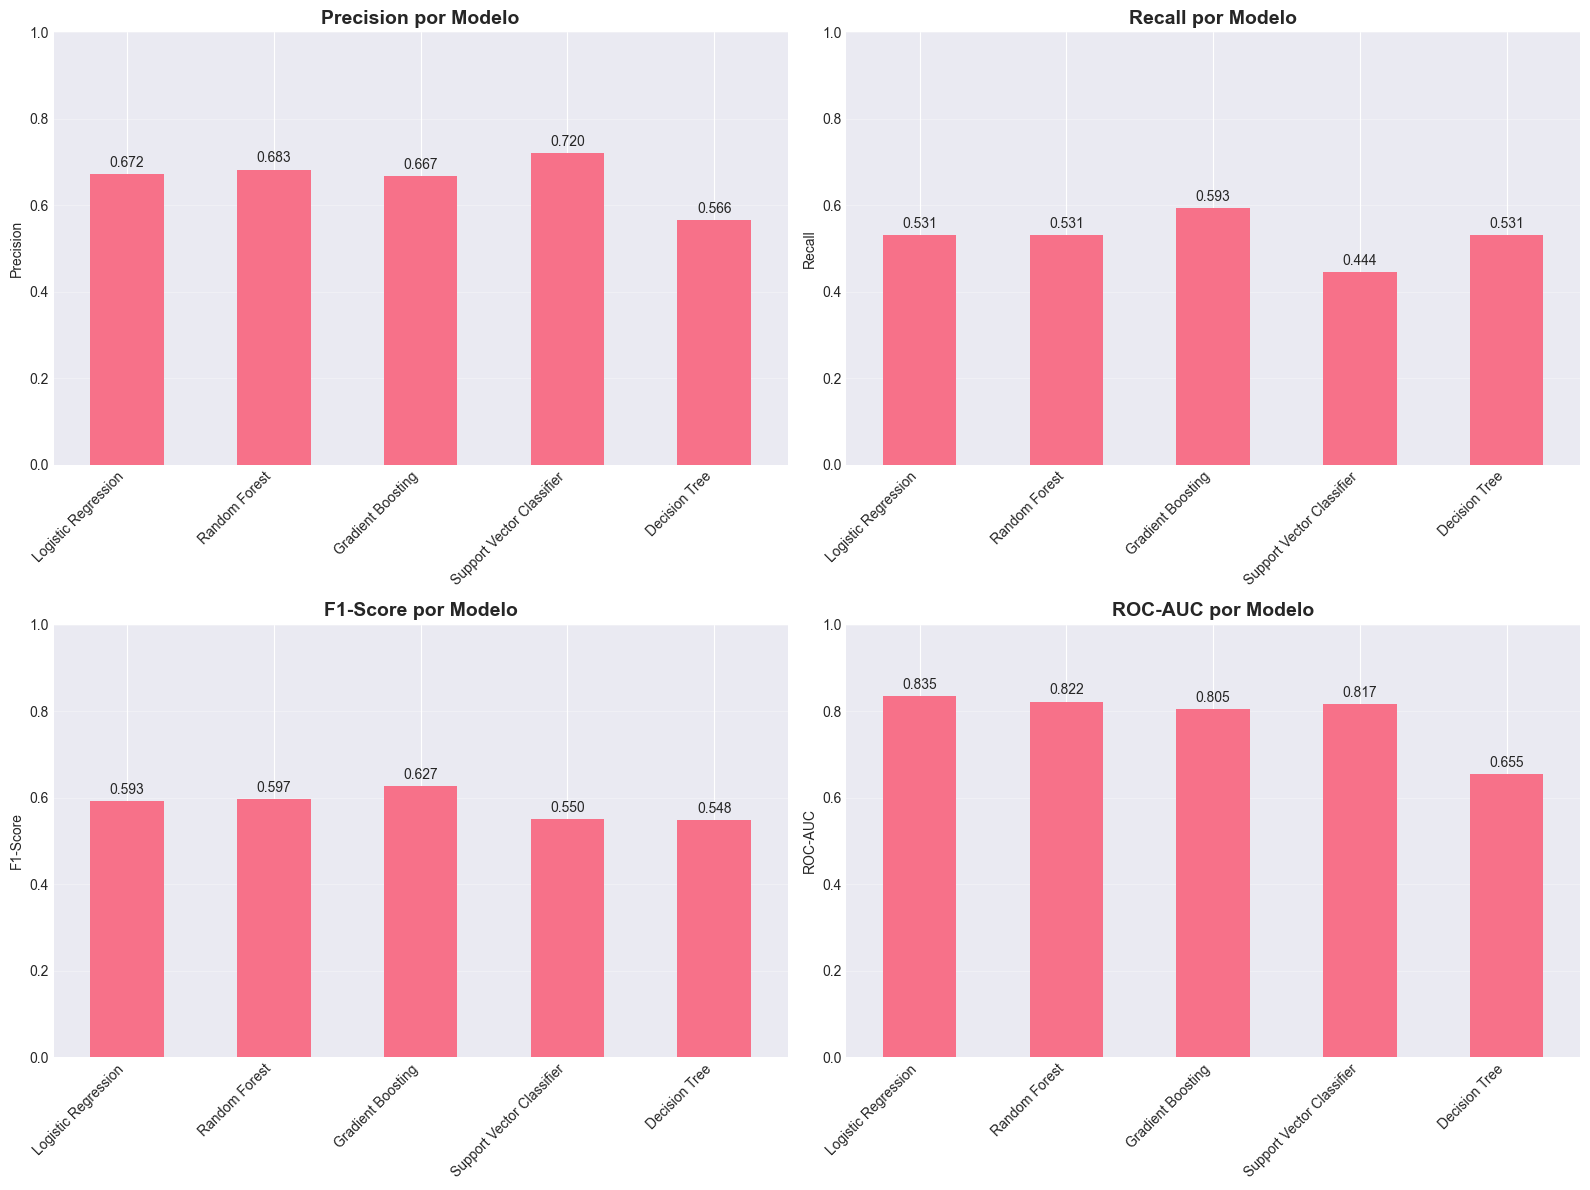

In [60]:
# Comparação de métricas
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Classifier', 'Decision Tree'],
    'Precision': [lr_results['precision'], rf_results['precision'], xgb_results['precision'], svc_results['precision'], dt_results['precision']],
    'Recall': [lr_results['recall'], rf_results['recall'], xgb_results['recall'], svc_results['recall'], dt_results['recall']],
    'F1-Score': [lr_results['f1'], rf_results['f1'], xgb_results['f1'], svc_results['f1'], dt_results['f1']],
    'ROC-AUC': [lr_results['roc_auc'], rf_results['roc_auc'], xgb_results['roc_auc'], svc_results['roc_auc'], dt_results['roc_auc']],
    'Tempo': [lr_results['tempo'], rf_results['tempo'], xgb_results['tempo'], svc_results['tempo'], dt_results['tempo']]
})

print("\n" + "="*80)
print("COMPARAÇÃO DE MODELOS ORIGINAL")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)

# Visualização
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} por Modelo', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1])
    
    # Adicionando valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

## 6. Estratégia 1: Padronização (StandardScaler) + SMOTE
Padroniza as features para terem média 0 e desvio padrão 1. Adequado para algoritmos que assumem distribuição normal ou são sensíveis a outliers de forma moderada.

In [61]:
# [CÓDIGO - Bloco 21 - StandardScaler]
# Normalização das features
from models.scaler import scaler_data

X_train_std, X_test_std, scaler_std = scaler_data(X_train, X_test)

print("✅ Formato X_train após StandardScaler:", X_train_std.shape)

✅ Formato X_train após StandardScaler: (537, 8)


In [62]:
# [CÓDIGO - 22 - SMOTE]
# Balanceamento das features
from models.smote import smote_data

X_train_std_bal, y_train_std_bal, smote = smote_data(X_train_std, y_train)

print("\nFormato X_train após SMOTE:", X_train_std_bal.shape)
print("Distribuição do target no treino após SMOTE:")
print(pd.Series(y_train_std_bal).value_counts())


Formato X_train após SMOTE: (700, 8)
Distribuição do target no treino após SMOTE:
Resultado
1    350
0    350
Name: count, dtype: int64


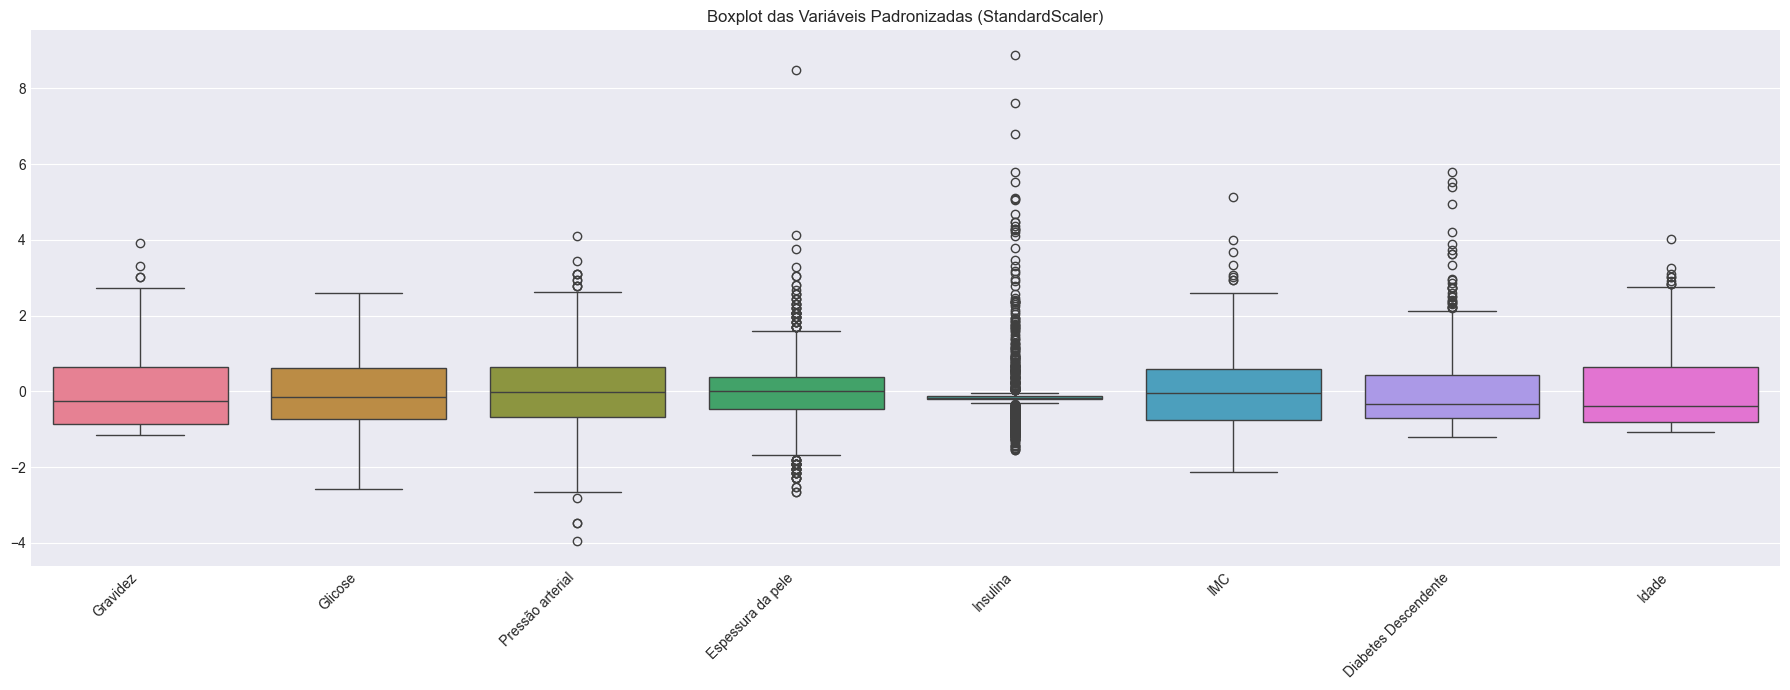

In [63]:
# Opcional: Visualizar dados padronizados (ex: boxplot)
# [CÓDIGO - Bloco 24: Boxplot Padronizado (aplicado a X_train_std_bal ou todo X padronizado)]
# Cuidado ao criar df_padronizado - não usar para treino/teste diretamente
from eda.eda_basic import ver_boxplot

df_padronizado_vis = pd.DataFrame(scaler_std.transform(X), columns=X.columns) # Para visualização
title = "Boxplot das Variáveis Padronizadas (StandardScaler)"

ver_boxplot(df_padronizado_vis, title)

In [64]:
# Logistic Regression
from models.v1.pipeline import pipeline

print(" -- < Dados StandardScaler + SMOTE > --")
model_type = "lr"
lr_results = pipeline(X_train_std_bal, X_test_std, y_train_std_bal, y_test, model_type)

# Random Forest
#model_type = "rf"
#rf_results = pipeline(X_train, X_test, y_train, y_test, model_type)      # Não usa StandarScaler

# XGBClassifier
model_type = "xgb"
xgb_results = pipeline(X_train_std_bal, X_test_std, y_train_std_bal, y_test, model_type)

# Support Vector Classifier
model_type = "svc"
svc_results = pipeline(X_train_std_bal, X_test_std, y_train_std_bal, y_test, model_type)

# Decision Tree
model_type = "dt"
dt_results = pipeline(X_train_std_bal, X_test_std, y_train_std_bal, y_test, model_type)

 -- < Dados StandardScaler + SMOTE > --

Treinando: Logistic Regression

Métricas no conjunto de teste:
  Precision: 0.6477
  Recall:    0.7037
  F1-Score:  0.6746
  ROC-AUC:   0.8368
  Tempo (1000): 0.0330s

Matriz de Confusão:
[[119  31]
 [ 24  57]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.83      0.79      0.81       150
      Fraude       0.65      0.70      0.67        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231

✅ Função de avaliação criada!

Treinando: XGBClassifier

Métricas no conjunto de teste:
  Precision: 0.6456
  Recall:    0.6296
  F1-Score:  0.6375
  ROC-AUC:   0.8159
  Tempo (1000): 0.2150s

Matriz de Confusão:
[[122  28]
 [ 30  51]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.80      0.81      0.81       150
      Fraude      

## 6. Comparação dos modelos 


COMPARAÇÃO DE MODELOS STANDARDSCALER + SMOTE
                    Model  Precision   Recall  F1-Score  ROC-AUC    Tempo
      Logistic Regression   0.647727 0.703704  0.674556 0.836790 0.033000
        Gradient Boosting   0.645570 0.629630  0.637500 0.815885 0.215002
Support Vector Classifier   0.666667 0.691358  0.678788 0.834691 0.206999
            Decision Tree   0.531915 0.617284  0.571429 0.661975 0.033005


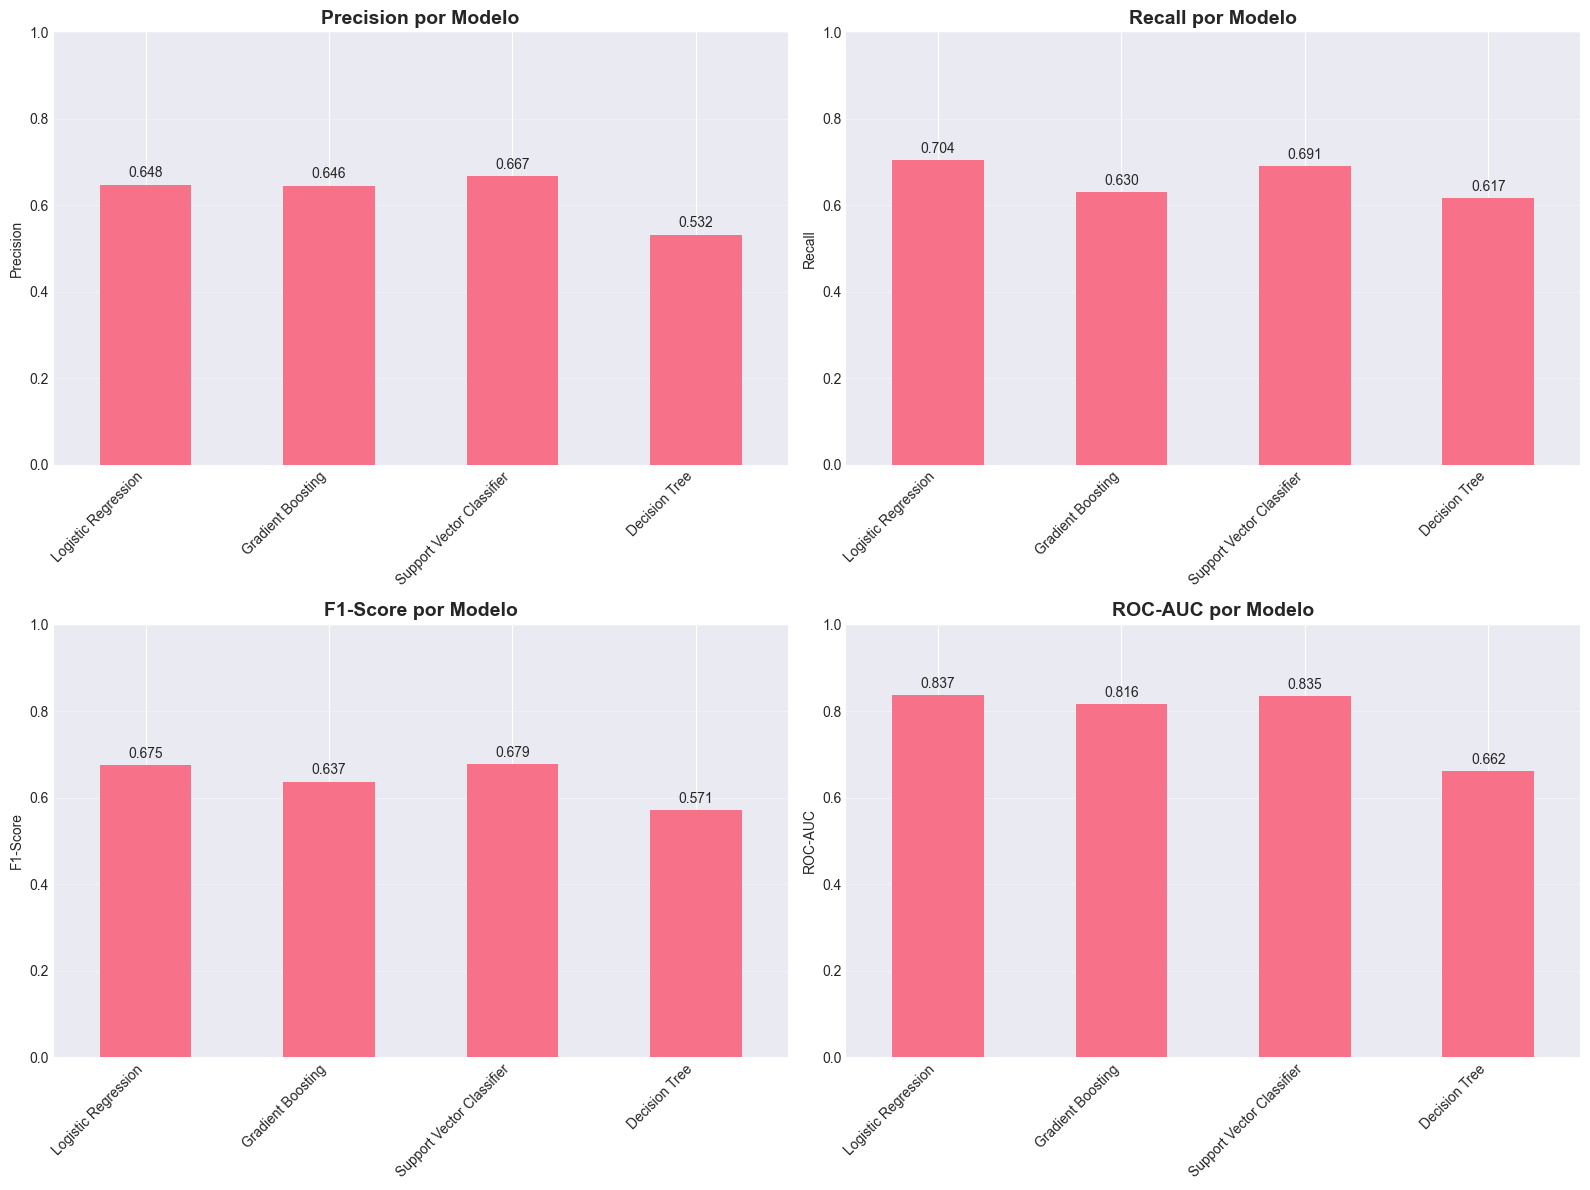

In [65]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting', 'Support Vector Classifier', 'Decision Tree'],
    'Precision': [lr_results['precision'], xgb_results['precision'], svc_results['precision'], dt_results['precision']],
    'Recall': [lr_results['recall'], xgb_results['recall'], svc_results['recall'], dt_results['recall']],
    'F1-Score': [lr_results['f1'], xgb_results['f1'], svc_results['f1'], dt_results['f1']],
    'ROC-AUC': [lr_results['roc_auc'], xgb_results['roc_auc'], svc_results['roc_auc'], dt_results['roc_auc']],
    'Tempo': [lr_results['tempo'], xgb_results['tempo'], svc_results['tempo'], dt_results['tempo']]
})

print("\n" + "="*80)
print("COMPARAÇÃO DE MODELOS STANDARDSCALER + SMOTE")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)

# Visualização
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} por Modelo', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1])
    
    # Adicionando valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

## 7. Estratégia 2: Normalização (MinMaxScaler) + SMOTE
Normaliza as features para um intervalo específico, geralmente [0, 1]. Útil quando os algoritmos não assumem distribuição normal (como KNN) ou quando se quer limites definidos. Pode ser sensível a outliers.

In [66]:
# [CÓDIGO - Bloco 25 & 26 combinado: MinMaxScaler + SMOTE]
# 1. Inicializar e ajustar o Scaler SOMENTE no treino
from models.scaler_minmax import scaler_minmax_data

X_train_norm, X_test_norm, scaler_minmax = scaler_minmax_data(X_train, X_test)

print("✅ Formato X_train após MinMaxScaler:", X_train_norm.shape)

✅ Formato X_train após MinMaxScaler: (537, 8)


In [67]:
# [CÓDIGO - Bloco 25 & 26 combinado: MinMaxScaler + SMOTE]
# 2. Aplicar SMOTE SOMENTE nos dados de treino já normalizados
# Reinstanciar SMOTE ou usar o mesmo objeto
# smote = SMOTE(random_state=42) # Já instanciado

from models.smote import smote_data

X_train_norm_bal, y_train_norm_bal, smote_norm = smote_data(X_train_norm, y_train)

print("\nFormato X_train após SMOTE:", X_train_norm_bal.shape)
print("Distribuição do target no treino após SMOTE:")
print(pd.Series(y_train_norm_bal).value_counts())


Formato X_train após SMOTE: (700, 8)
Distribuição do target no treino após SMOTE:
Resultado
1    350
0    350
Name: count, dtype: int64


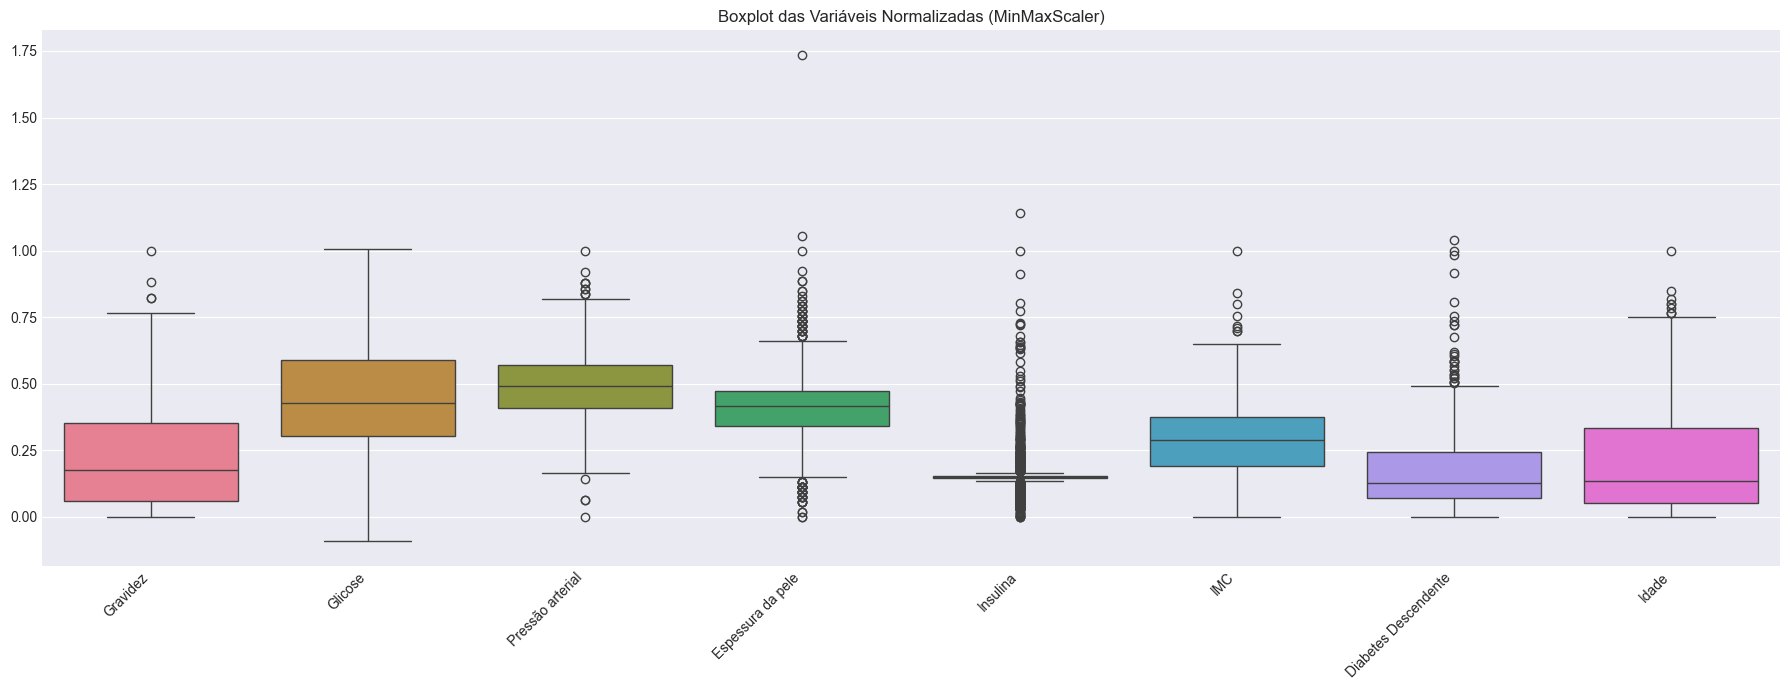

In [68]:
# Opcional: Visualizar dados normalizados
# [CÓDIGO - Bloco 28: Boxplot Normalizado]
from eda.eda_basic import ver_boxplot

df_normalizado_vis = pd.DataFrame(scaler_minmax.transform(X), columns=X.columns) # Para visualização
title = "Boxplot das Variáveis Normalizadas (MinMaxScaler)"

ver_boxplot(df_normalizado_vis, title)

In [69]:
# Logistic Regression
from models.v1.pipeline import pipeline

print(" -- < Dados MinMaxScaler + SMOTE > --")
model_type = "lr"
lr_results = pipeline(X_train_norm_bal, X_test_norm, y_train_norm_bal, y_test, model_type)

# Random Forest
#model_type = "rf"
#rf_results = pipeline(X_train, X_test, y_train, y_test, model_type)      # MinMaxScaler + SMOTE

# XGBClassifier
model_type = "xgb"
xgb_results = pipeline(X_train_norm_bal, X_test_norm, y_train_norm_bal, y_test, model_type)

# Support Vector Classifier
model_type = "svc"
svc_results = pipeline(X_train_norm_bal, X_test_norm, y_train_norm_bal, y_test, model_type)

# Decision Tree
model_type = "dt"
dt_results = pipeline(X_train_norm_bal, X_test_norm, y_train_norm_bal, y_test, model_type)

 -- < Dados MinMaxScaler + SMOTE > --

Treinando: Logistic Regression

Métricas no conjunto de teste:
  Precision: 0.6222
  Recall:    0.6914
  F1-Score:  0.6550
  ROC-AUC:   0.8373
  Tempo (1000): 0.0260s

Matriz de Confusão:
[[116  34]
 [ 25  56]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.82      0.77      0.80       150
      Fraude       0.62      0.69      0.65        81

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.74      0.75       231

✅ Função de avaliação criada!

Treinando: XGBClassifier

Métricas no conjunto de teste:
  Precision: 0.6410
  Recall:    0.6173
  F1-Score:  0.6289
  ROC-AUC:   0.8063
  Tempo (1000): 0.2270s

Matriz de Confusão:
[[122  28]
 [ 31  50]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.80      0.81      0.81       150
      Fraude       0

## 7.1 Comparação dos modelos 


COMPARAÇÃO DE MODELOS MINIMAXSCALER + SMOTE
                    Model  Precision   Recall  F1-Score  ROC-AUC    Tempo
      Logistic Regression   0.622222 0.691358  0.654971 0.837284 0.026004
        Gradient Boosting   0.641026 0.617284  0.628931 0.806255 0.226997
Support Vector Classifier   0.640449 0.703704  0.670588 0.831029 0.197994
            Decision Tree   0.569444 0.506173  0.535948 0.649753 0.028011


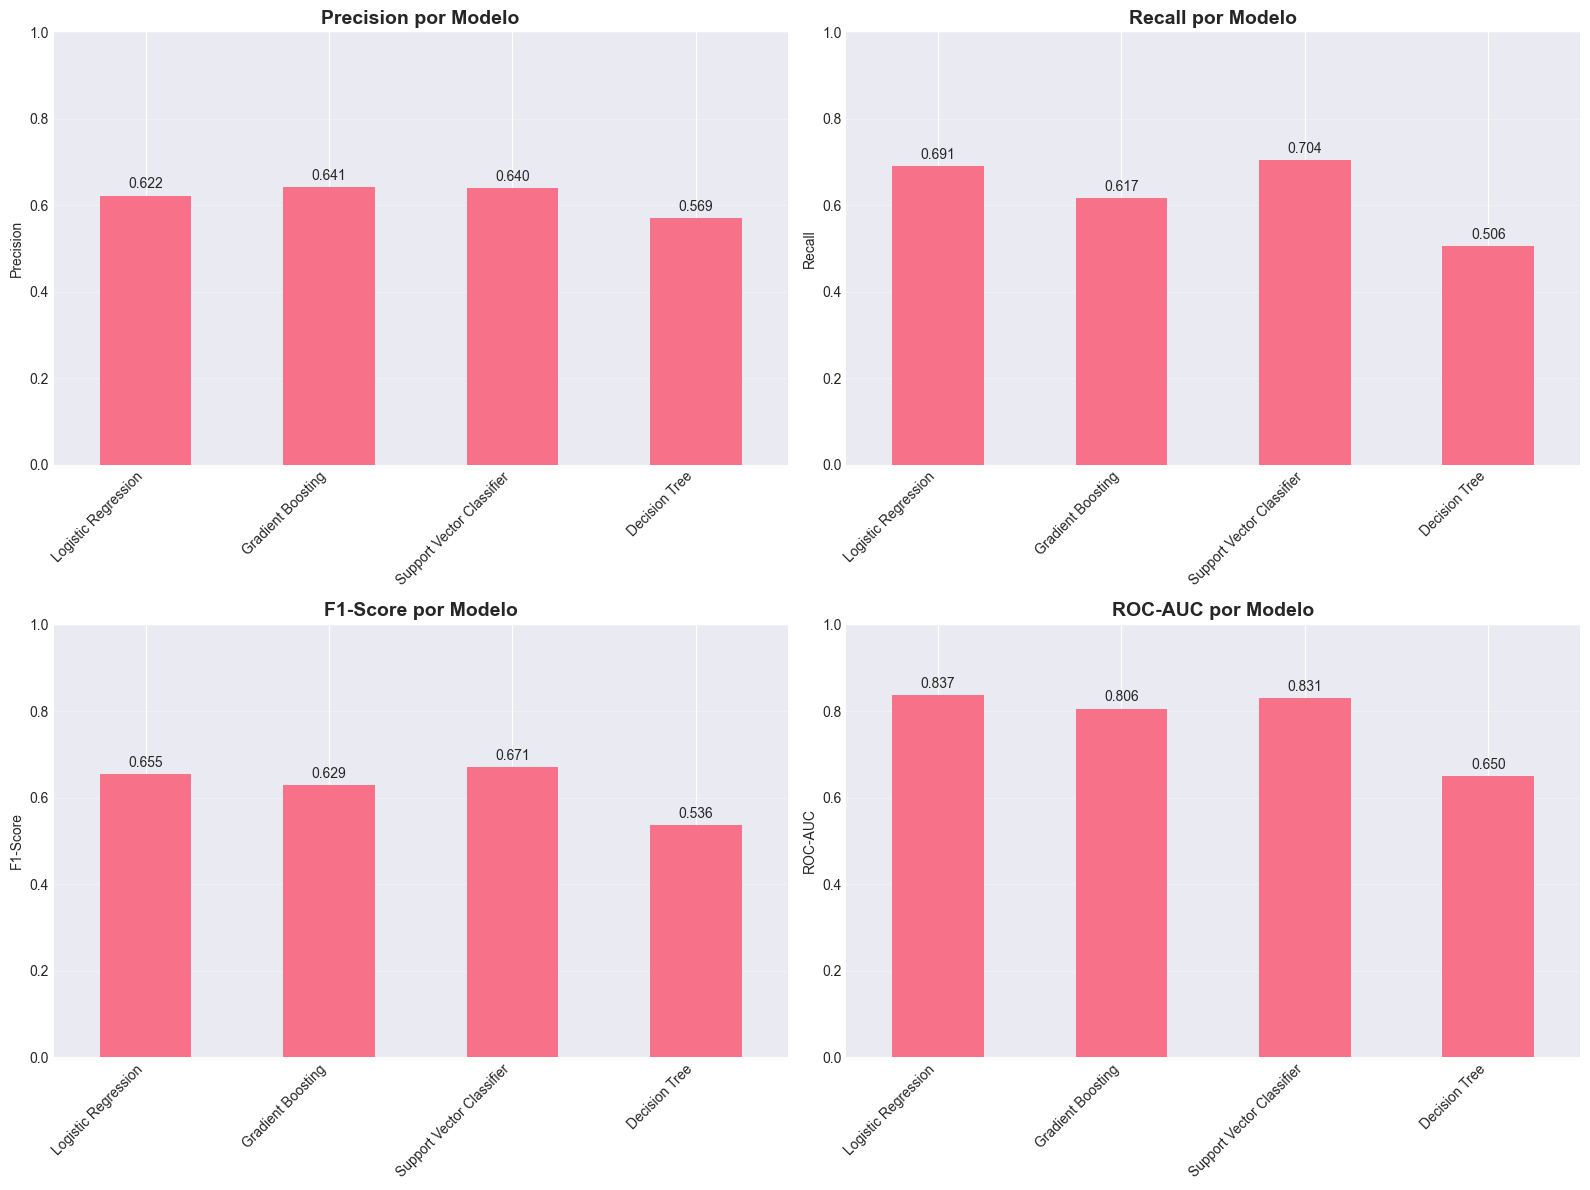

In [70]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting', 'Support Vector Classifier', 'Decision Tree'],
    'Precision': [lr_results['precision'], xgb_results['precision'], svc_results['precision'], dt_results['precision']],
    'Recall': [lr_results['recall'], xgb_results['recall'], svc_results['recall'], dt_results['recall']],
    'F1-Score': [lr_results['f1'], xgb_results['f1'], svc_results['f1'], dt_results['f1']],
    'ROC-AUC': [lr_results['roc_auc'], xgb_results['roc_auc'], svc_results['roc_auc'], dt_results['roc_auc']],
    'Tempo': [lr_results['tempo'], xgb_results['tempo'], svc_results['tempo'], dt_results['tempo']]
})

print("\n" + "="*80)
print("COMPARAÇÃO DE MODELOS MINIMAXSCALER + SMOTE")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)

# Visualização
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} por Modelo', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1])
    
    # Adicionando valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

### 8. Estratégia 3: Escalonamento Misto (ColumnTransformer) + SMOTE
Aplica diferentes scalers a diferentes colunas, baseado em suas características. Aqui, usamos RobustScaler (bom para outliers) em algumas, StandardScaler em outras, e deixamos algumas sem escalar ('passthrough').

In [71]:
# 1. Definir colunas e criar o ColumnTransformer
colunas_robust = ['Insulina', 'Espessura da pele', 'IMC', 'Diabetes Descendente', 'Gravidez'] # Adicionei mais algumas que podem ter outliers
colunas_standard = ['Glicose', 'Pressão arterial', 'Idade'] # Idade pode ir aqui ou passthrough
# As colunas restantes (se houver) serão tratadas pelo 'remainder'
transformer_misto = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), colunas_robust),
        ('standard', StandardScaler(), colunas_standard)
    ],
    remainder='passthrough' # Mantém as colunas não especificadas (se houver)
    # Ou remainder='drop' se quiser descartá-las
)

In [72]:
# [CÓDIGO - Bloco 29 & 30 combinado: Mixed Scaling + SMOTE]
from models.scaler_misto import scaler_misto_data

X_train_misto, X_test_misto, transformer_misto = scaler_misto_data(X_train, X_test, colunas_robust, colunas_standard)

# Obter nomes das features após transformação (importante!)
feature_names_misto = transformer_misto.get_feature_names_out()
print("Nomes das features após ColumnTransformer:", feature_names_misto)
print("Formato X_train após Misto:", X_train_misto.shape)

Nomes das features após ColumnTransformer: ['robust__Insulina' 'robust__Espessura da pele' 'robust__IMC'
 'robust__Diabetes Descendente' 'robust__Gravidez' 'standard__Glicose'
 'standard__Pressão arterial' 'standard__Idade']
Formato X_train após Misto: (537, 8)


In [73]:
# 3. Aplicar SMOTE SOMENTE nos dados de treino já transformados
from models.smote import smote_data

X_train_misto_bal, y_train_misto_bal, smote_misto = smote_data(X_train_misto, y_train)

print("\nFormato X_train após SMOTE:", X_train_misto_bal.shape)
print("Distribuição do target no treino após SMOTE:")
print(pd.Series(y_train_misto_bal).value_counts())


Formato X_train após SMOTE: (700, 8)
Distribuição do target no treino após SMOTE:
Resultado
1    350
0    350
Name: count, dtype: int64


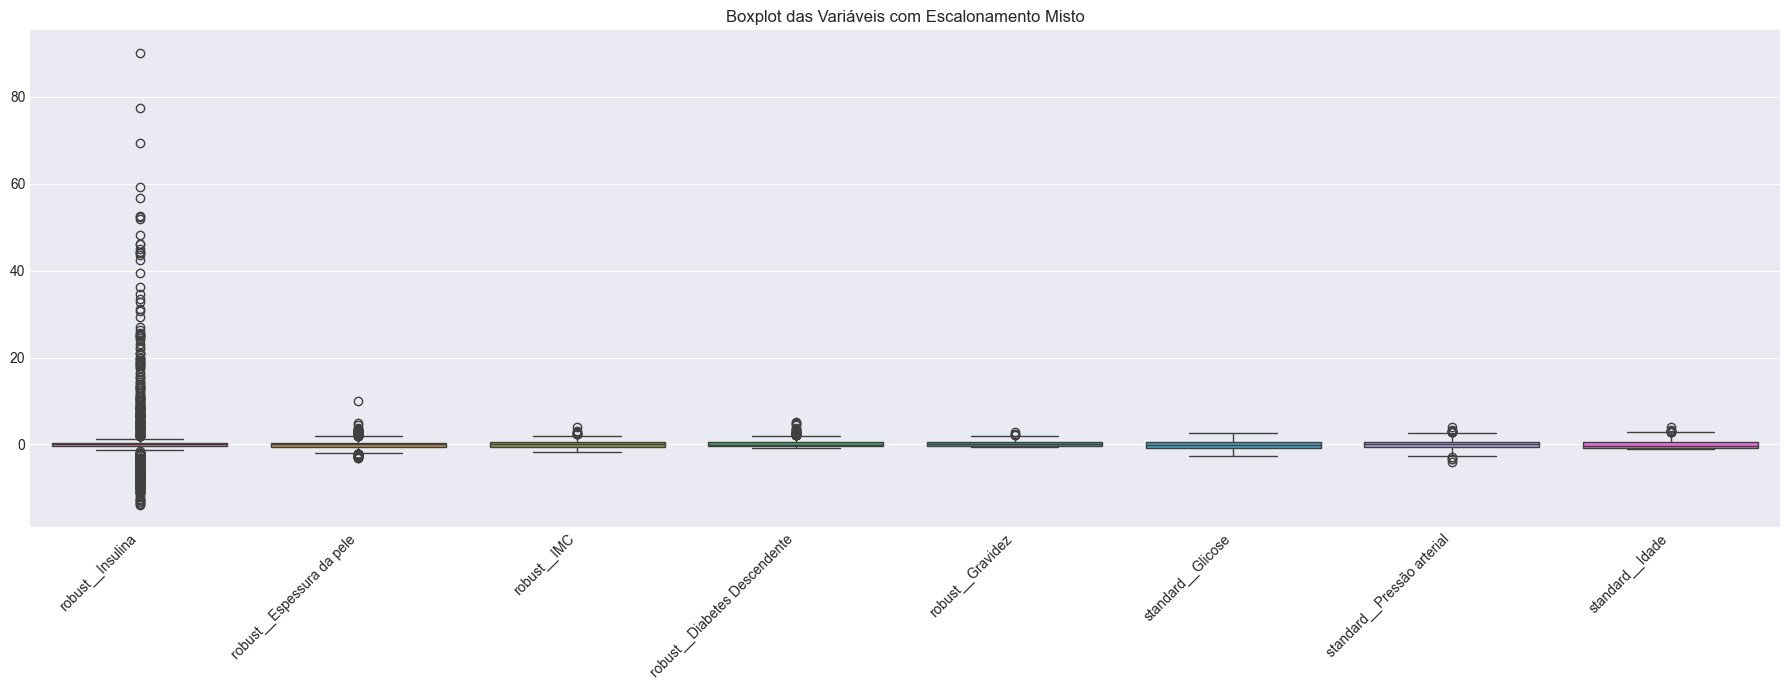

In [74]:
# Opcional: Visualizar dados mistos
# [CÓDIGO - Bloco 32: Boxplot Misto]
# Cuidado ao criar df_misto - usar nomes corretos das features
from eda.eda_basic import ver_boxplot

df_misto_vis = pd.DataFrame(transformer_misto.transform(X), columns=feature_names_misto) # Para visualização
title = "Boxplot das Variáveis com Escalonamento Misto"

ver_boxplot(df_misto_vis, title)

In [75]:
# Logistic Regression
from models.v1.pipeline import pipeline

print(" -- < Dados StandardScaler > --")
model_type = "lr"
lr_results = pipeline(X_train_misto_bal, X_test_misto, y_train_misto_bal, y_test, model_type)

# Random Forest
#model_type = "rf"
#rf_results = pipeline(X_train, X_test, y_train, y_test, model_type)

# XGBClassifier
model_type = "xgb"
xgb_results = pipeline(X_train_misto_bal, X_test_misto, y_train_misto_bal, y_test, model_type)

# Support Vector Classifier
model_type = "svc"
svc_results = pipeline(X_train_misto_bal, X_test_misto, y_train_misto_bal, y_test, model_type)

# Decision Tree
model_type = "dt"
dt_results = pipeline(X_train_misto_bal, X_test_misto, y_train_misto_bal, y_test, model_type)

 -- < Dados StandardScaler > --

Treinando: Logistic Regression

Métricas no conjunto de teste:
  Precision: 0.6404
  Recall:    0.7037
  F1-Score:  0.6706
  ROC-AUC:   0.8374
  Tempo (1000): 0.0350s

Matriz de Confusão:
[[118  32]
 [ 24  57]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.83      0.79      0.81       150
      Fraude       0.64      0.70      0.67        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.76      0.76      0.76       231

✅ Função de avaliação criada!

Treinando: XGBClassifier

Métricas no conjunto de teste:
  Precision: 0.6410
  Recall:    0.6173
  F1-Score:  0.6289
  ROC-AUC:   0.8026
  Tempo (1000): 0.3010s

Matriz de Confusão:
[[122  28]
 [ 31  50]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.80      0.81      0.81       150
      Fraude       0.64   

## 8.1 Comparação dos modelos 


COMPARAÇÃO DE MODELOS MISTO + SMOTE (ColumnTransformer)
                    Model  Precision   Recall  F1-Score  ROC-AUC    Tempo
      Logistic Regression   0.640449 0.703704  0.670588 0.837366 0.035032
        Gradient Boosting   0.641026 0.617284  0.628931 0.802634 0.301003
Support Vector Classifier   0.565657 0.691358  0.622222 0.815391 0.237046
            Decision Tree   0.538462 0.604938  0.569767 0.662469 0.030043


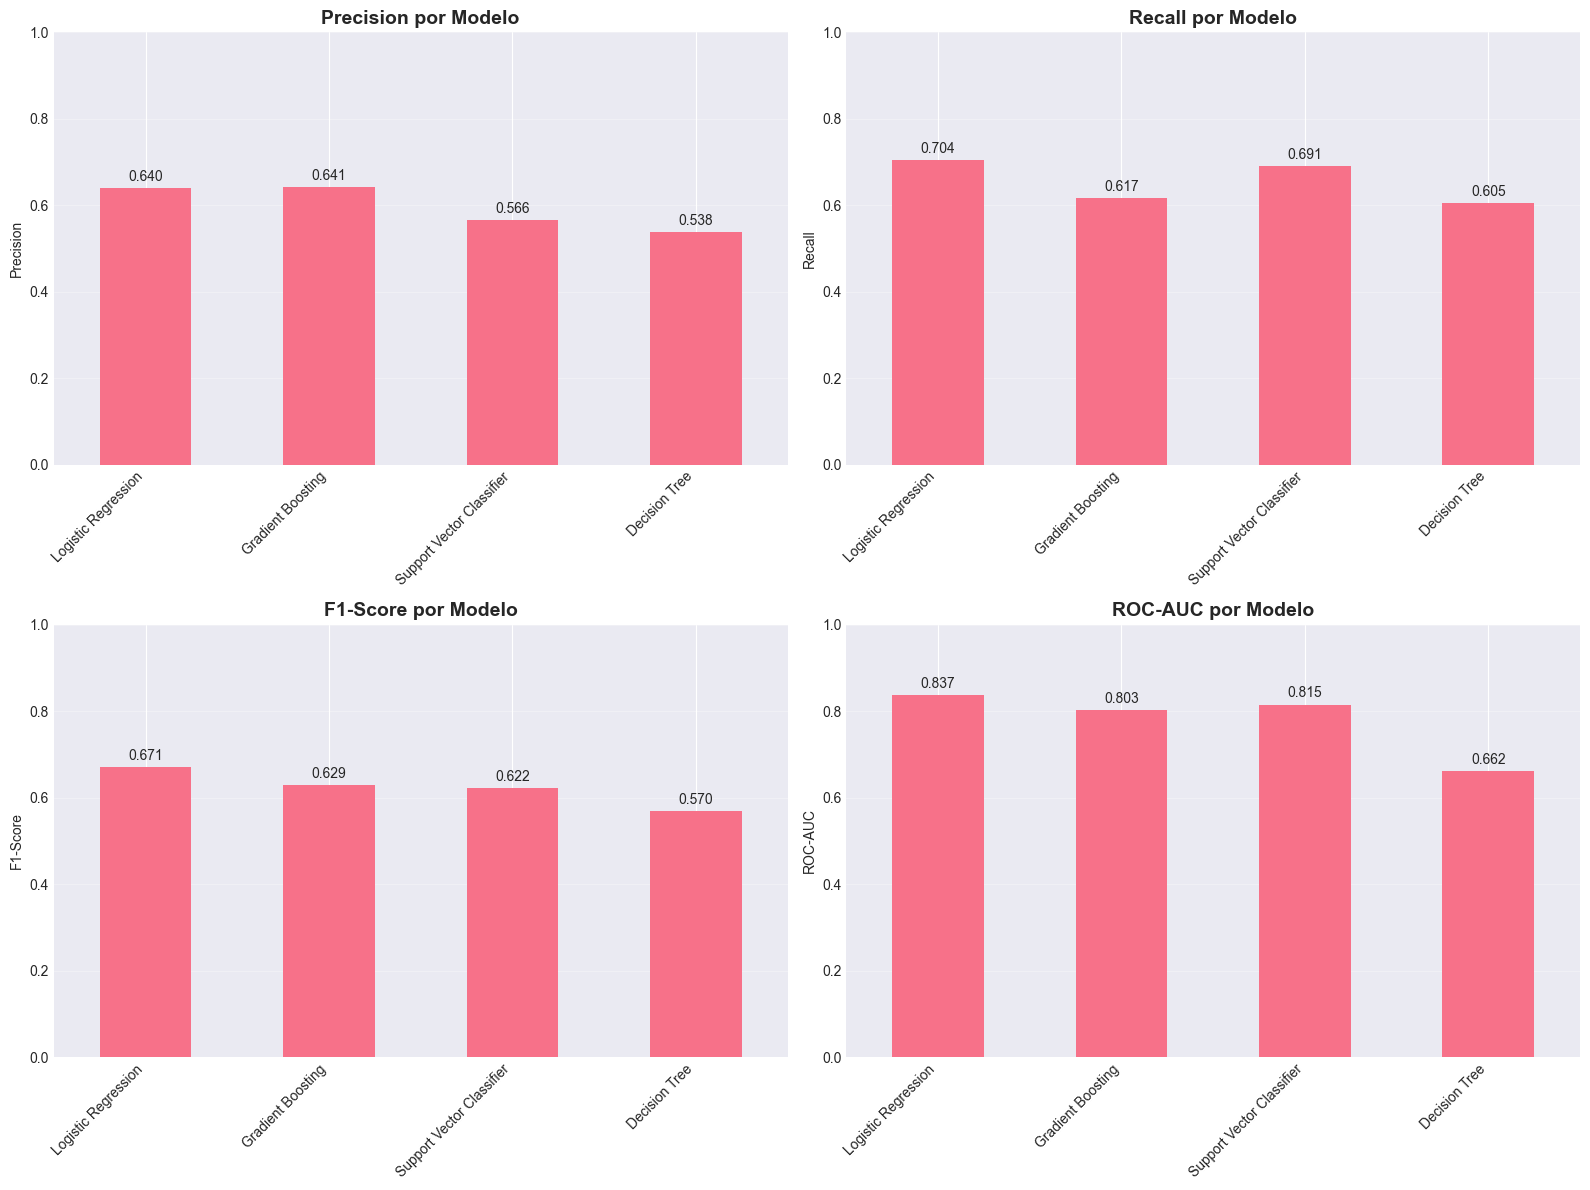

In [76]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting', 'Support Vector Classifier', 'Decision Tree'],
    'Precision': [lr_results['precision'], xgb_results['precision'], svc_results['precision'], dt_results['precision']],
    'Recall': [lr_results['recall'], xgb_results['recall'], svc_results['recall'], dt_results['recall']],
    'F1-Score': [lr_results['f1'], xgb_results['f1'], svc_results['f1'], dt_results['f1']],
    'ROC-AUC': [lr_results['roc_auc'], xgb_results['roc_auc'], svc_results['roc_auc'], dt_results['roc_auc']],
    'Tempo': [lr_results['tempo'], xgb_results['tempo'], svc_results['tempo'], dt_results['tempo']]
})

print("\n" + "="*80)
print("COMPARAÇÃO DE MODELOS MISTO + SMOTE (ColumnTransformer)")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)

# Visualização
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} por Modelo', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1])
    
    # Adicionando valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

nterpretação Baseline:* Analisar os resultados, focando no `recall` e `f1-score` para a classe 1 (diabéticos). É esperado que, sem balanceamento e/ou escalonamento adequado, o desempenho na classe minoritária seja baixo para muitos modelos.

## 9. Comparação Sistemática com Pipelines (Pré-processamento + SMOTE + Modelo)

Esta é a abordagem recomendada para comparar o efeito das diferentes estratégias de pré-processamento combinadas com o balanceamento SMOTE. Usamos `imblearn.pipeline.make_pipeline` para garantir que o SMOTE seja aplicado corretamente (apenas no treino) e o pré-processamento também siga a ordem correta. Escolhemos um modelo (RandomForest) para a comparação.

## 10. Conclusão

Após analisar e comparar diferentes estratégias de pré-processamento e o uso de balanceamento com SMOTE, observamos que:

*   O dataset original apresentava desbalanceamento significativo, prejudicando o desempenho na identificação da classe minoritária (diabéticos) em modelos baseline.
*   A aplicação de SMOTE nos dados de treino foi crucial para melhorar o recall da classe 1.
*   Comparando as técnicas de escalonamento dentro de um pipeline com SMOTE e RandomForest, a estratégia de **[Nome da Melhor Estratégia, ex: Padronização (StandardScaler)]** apresentou o melhor equilíbrio entre acurácia geral e, principalmente, o **Recall para a classe 1 (diabéticos)**, atingindo um valor de [Valor do Recall 1].
*   [Outra observação importante, se houver, ex: O escalonamento misto não trouxe vantagens significativas sobre a padronização simples neste caso].

[“Modelos com SMOTE foram avaliados apenas para análise comparativa.
O modelo final foi escolhido considerando estabilidade, simplicidade operacional e aderência ao cenário de produção.”]

**Próximos Passos Possíveis:**
*  [ ] Otimização de hiperparâmetros do modelo final escolhido (ex: RandomForest) usando GridSearchCV ou RandomizedSearchCV com o pipeline definido.
*  [ ] Testar outros algoritmos de classificação (ex: Gradient Boosting, Redes Neurais) dentro da estrutura de pipeline.
*  [ ] Realizar uma análise mais aprofundada das features mais importantes para o modelo final.
*  [ ] Coletar mais dados, se possível, especialmente da classe minoritária.